In [100]:
def plotData(X, y):
    pos = np.where(y==1)
    neg = np.where(y==0)
    
    plt.figure
    plt.scatter(X[pos,0],X[pos,1],label='positive')
    plt.scatter(X[neg,0],X[neg,1],label='negative')
    plt.xlabel('Test 1')
    plt.ylabel('Test 2')
    plt.legend(loc='best')

In [101]:
def mapFeature(X1, X2):
    degree = 6
    n=X1.shape[0]
    
    out = np.ones(shape=(n,1))
    for i in range(1,degree+1):
        for j in range (0,i+1):
            add = (X1**(i-j)*X2**j)
            out = np.append(out,add,axis=1)
    return out

In [102]:
def sigmoid(z):
    g = np.zeros(shape=z.shape)
    g = 1/(1+np.exp(-z))
    g = g.reshape(-1,1)
    return g

In [103]:
def computeCost(theta, X, y, _lambda):
    m = y.shape[0]
    n = X.shape[1]
    
    J = 0
    #grad = np.zeros(shape=theta.shape)
    
    h = sigmoid(X@theta)
    J = -1/m * (y.T@np.log(h) + (1-y).T@np.log(1-h)-(_lambda/2)*(theta[1:].T@theta[1:]))
    
    #grad[0] = 1/m * ((X[:,0]).T@(h-y)) 
    #grad[1:] = 1/m * (X[:,1:].T@(h-y)) + (_lambda/m)*theta[1:]
    
    return J.item()

In [104]:
def gradientDescent(X, y ,theta, alpha, _lambda, num_iters):
    m = y.shape[0]
    
    J_history = []
    dtheta = np.zeros(shape=theta.shape)
    
    for iter in range(num_iters):
        h = sigmoid(X@theta)
        
        dtheta[0] = 1/m * ((X[:,0]).T@(h-y))
        dtheta[1:] = 1/m * (X[:,1:].T@(h-y)) + (_lambda/m)*theta[1:]
        
        theta = theta*(1-alpha*_lambda/m) - alpha*dtheta
        J_history.append(computeCost(theta, X, y, _lambda))
    
    return theta, J_history

In [105]:
def predict(theta, X):
    m = X.shape[0]
    p = np.zeros(shape=(m,1))
    h = sigmoid(X@theta)
    
    p[h>=0.5]=1
    p[h<0.5]=0
    
    return p

In [127]:
def plotDecisionBoundary(theta, X, y):
    plotData(X[:,1:3],y)
    
    m=X.shape[0]
    xx = np.linspace(-1, 1.5, 50).reshape(50,1)
    yy = np.linspace(-1, 1.5, 50).reshape(50,1)
    
    Z = np.zeros(shape=(len(xx),len(yy)))
    I_50 = np.zeros(shape=(len(theta),50))

    Z = mapFeature(xx, yy[j].reshape(1,1))@(theta+I_50)
    
    xx, yy = np.meshgrid(yy, xx)
            
    Z=Z.T
    plt.contour(xx, yy, Z, levels=[0])
    

In [133]:
(theta+np.zeros(shape=(28,50))).shape

(28, 50)

Train accuracy:  82.20338983050848


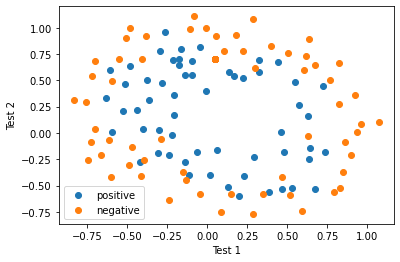

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("ex2data2.txt",names=['Test 1','Test 2','Decission']) 

X = data.iloc[:, 0:2].to_numpy()
y = data.iloc[:,2].to_numpy()
y = y.reshape(len(y),1)

m = X.shape[0]
#ploting the data
plotData(X,y)

#adding new features
X = mapFeature(X[:,0].reshape(m,1), X[:,1].reshape(m,1))

#initialize fitting parameters
theta = np.zeros(shape=(X.shape[1],1))

#set regularization parameter
_lambda = 1

alpha = 0.7

theta, cost = gradientDescent(X, y, theta, alpha, _lambda, 100)

p = predict(theta, X)

accuracy = np.mean(p==y)*100

print("Train accuracy: ",accuracy)


#cost, grad = costFunction(initial_theta, X, y, _lambda)

#from scipy.optimize import minimize

#res = minimize(costFunction(theta,X,y,_lambda), initial_theta, method='nelder-mead',options={'xatol': 1e-8, 'disp': True})

(50, 1)


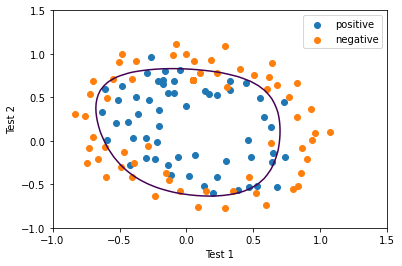

In [126]:
plotDecisionBoundary(theta, X, y)